# <font color="yellow"> Data Analysis Corrado

In [66]:
# pip install seaborn

In [67]:
# Import necessary Libraries
import os
import matsim
import pandas as pd
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from collections import defaultdict
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

In [68]:
import os
import platform

def get_data_folder_path():
    # Get the current operating system
    os_type = platform.system()
    user_name = os.getlogin()

    # Define data folder paths for different systems
    if os_type == 'Windows' and user_name == 'Alice':
        data_folder_path = f"C:\\Users\\{user_name}\\Documents\\Data"
    elif os_type == 'Linux' and user_name == 'salathem':
        data_folder_path = '/cluster/home/salathem/Programming/data/'
    elif os_type == 'Darwin':
        data_folder_path = '/Users/Marco/Library/CloudStorage/OneDrive-Persönlich/ETHZ/Agent Based Modeling/data/'
    else:
        raise Exception("Unsupported system configuration")

    return data_folder_path

In [69]:
# Path of the .gz file
data_folder_path = get_data_folder_path()
plan_path = data_folder_path + '/scenarios/Zurich/10pct/zurich_population_10pct.xml.gz'

In [70]:
# Read the data
plan_df = matsim.plan_reader_dataframe(plan_path)

## <font color="green"> Activities Dataframe

In [71]:
# Shape of activities dataframe
plan_df.activities.shape

(1052661, 13)

In [72]:
# Head of activities dataframe
plan_df.activities

,id,plan_id,type,link,facility,x,y,end_time,headway_min,max_dur,start_time,city,typeBeforeCutting
0,1,1,home,270549,home4,2679482.0,1237545.0,07:50:56,30.0,NaN,NaN,NaN,NaN
1,2,1,pt interaction,617713,NaN,2679299.97008475,1237575.0077440983,NaN,NaN,00:00:00,NaN,NaN,NaN
2,3,1,pt interaction,586404,NaN,2681990.0107938214,1247298.9705903793,NaN,NaN,00:00:00,NaN,NaN,NaN
3,4,1,pt interaction,4222,NaN,2681934.8161827456,1247302.7661533705,NaN,NaN,00:00:00,NaN,NaN,NaN
4,5,1,pt interaction,955504,NaN,2683187.8521402166,1248065.21559948,NaN,NaN,00:00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052656,1052657,133776,freight_unloading,35479,26754,2682060.0,1246395.0,30:00:00,NaN,NaN,14:34:42,true,NaN
1052657,1052658,133777,outside,955137,outside_172,2674949.6031440143,1256659.6554805986,09:04:30,Infinity,NaN,NaN,NaN,NaN
1052658,1052659,133777,outside,1051610,outside_173,2676371.5836751675,1258109.5280177006,09:07:36,NaN,NaN,NaN,NaN,NaN
1052659,1052660,133778,outside,656482,outside_12,2672729.0272778366,1252736.3294066396,13:05:42,12.0,NaN,NaN,NaN,NaN


In [73]:
#plan_df.activities[plan_df.activities['plan_id'] == 1]

In [74]:
plan_df.activities.isnull().sum()

id                         0
plan_id                    0
type                       0
link                       0
facility              385067
x                          0
y                          0
end_time              464683
headway_min           518845
max_dur               667594
start_time            712467
city                  810649
typeBeforeCutting    1051410
dtype: int64

In [75]:
plan_df.activities['type'].value_counts()

type
pt interaction       385067
outside              247934
home                 206399
work                  77309
leisure               52304
shop                  34409
other                 28114
education             16500
freight_loading        2326
freight_unloading      2299
Name: count, dtype: int64

/tmp/ipykernel_11725/1408306275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_activities.index, y=missing_counts_activities.values, palette="pastel")


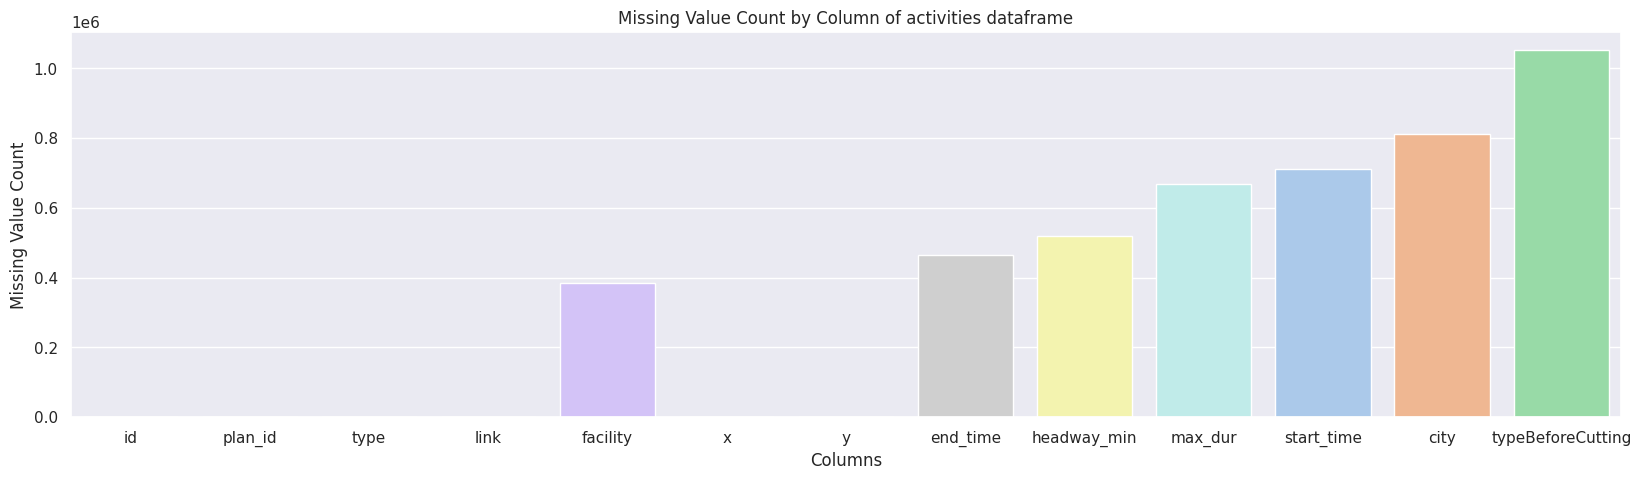

In [76]:
# Plot of missing values of activities dataframe
missing_counts_activities = plan_df.activities.isnull().sum()

# Set the style
sns.set(style="darkgrid")

# Create a countplot to visualize missing value counts
plt.figure(figsize=(20, 5))
sns.barplot(x=missing_counts_activities.index, y=missing_counts_activities.values, palette="pastel")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Count by Column of activities dataframe")
plt.show()

In [77]:
# Unique plan_id of tyhe activities dataframe
plan_df.activities['plan_id'].nunique()

133778

## <font color="green"> Legs Dataframe

In [78]:
# Shape of the legs dataframe
plan_df.legs.shape

(918883, 6)

In [79]:
# Head of the legs dataframe
plan_df.legs.head()

,id,plan_id,mode,dep_time,trav_time,routingMode
0,1,1,access_walk,07:50:56,00:03:20,pt
1,2,1,pt,07:54:16,00:47:44,pt
2,3,1,walk,08:42:00,00:00:59,pt
3,4,1,pt,08:42:59,00:12:00,pt
4,5,1,walk,08:55:00,00:00:00,pt


/tmp/ipykernel_11725/863743039.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_legs.index, y=missing_counts_legs.values, palette="pastel")


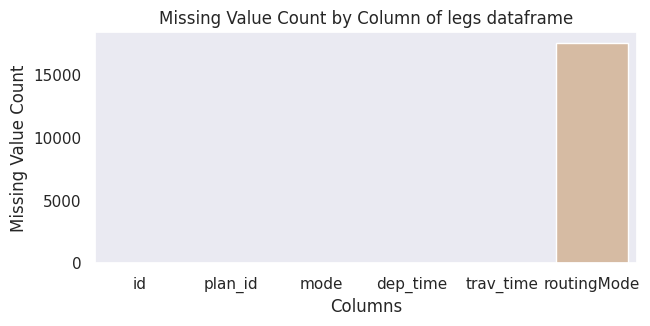

In [80]:
# Plot of missing values of legs dataframe
missing_counts_legs = plan_df.legs.isnull().sum()

# Set the style
sns.set(style="dark")

# Create a countplot to visualize missing value counts
plt.figure(figsize=(7, 3))
sns.barplot(x=missing_counts_legs.index, y=missing_counts_legs.values, palette="pastel")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Count by Column of legs dataframe")
plt.show()

## <font color="green"> Persons Dataframe

In [81]:
# Shape of persons dataframe
plan_df.persons.shape

(133778, 22)

/tmp/ipykernel_11725/1571534594.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_persons.index, y=missing_counts_persons.values, palette="pastel")


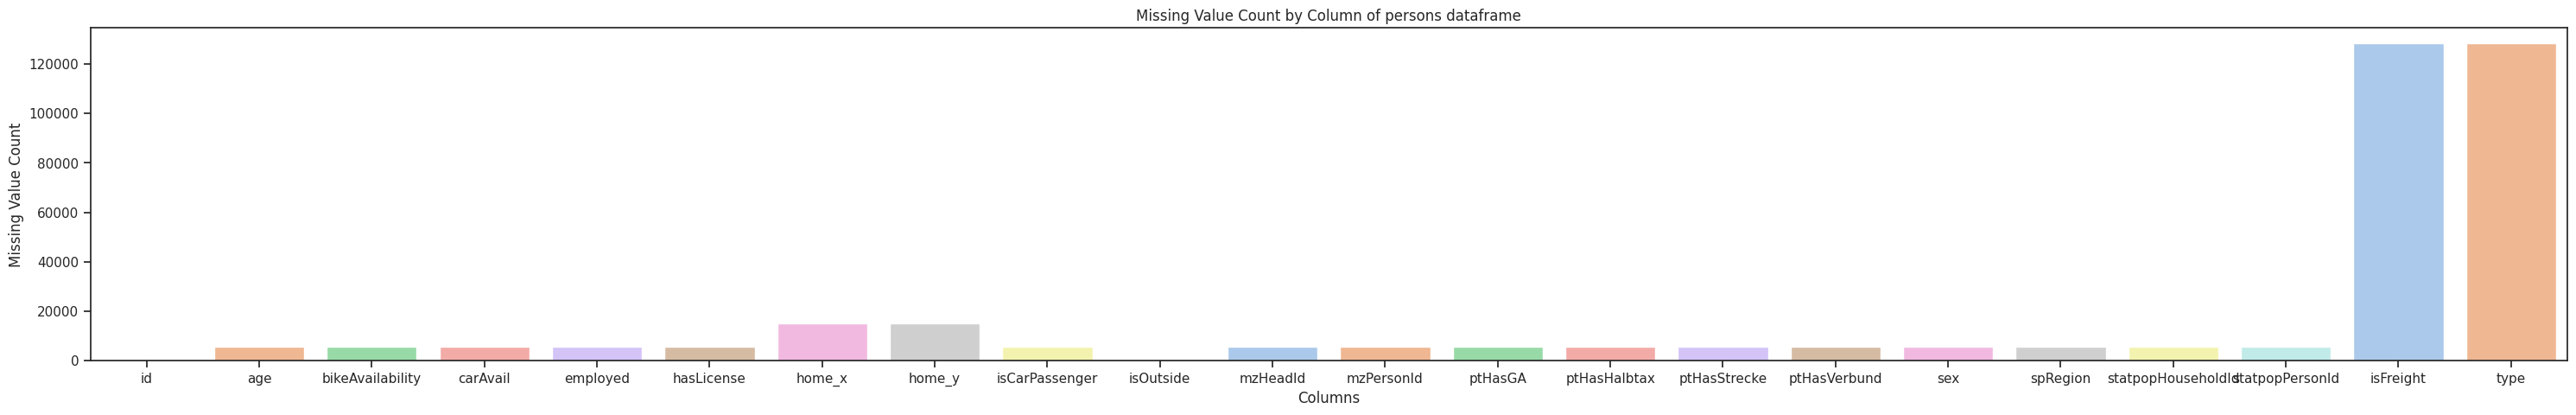

In [82]:
# Plot of missing values of persons dataframe
missing_counts_persons = plan_df.persons.isnull().sum()

# Set the style
sns.set(style="ticks")

# Create a countplot to visualize missing value counts
plt.figure(figsize=(37, 5))
sns.barplot(x=missing_counts_persons.index, y=missing_counts_persons.values, palette="pastel")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Count by Column of persons dataframe")
plt.show()

In [83]:
# Drop rows with missin values of age columns in persons dataframe
plan_df.persons.dropna(subset=['age'], inplace=True)

In [84]:
# Shape of dropped datafarme
plan_df.persons.shape

(128263, 22)

In [85]:
# Head of dropped persons dataframe
plan_df.persons.head()

,id,age,bikeAvailability,carAvail,employed,hasLicense,home_x,home_y,isCarPassenger,isOutside,mzHeadId,mzPersonId,ptHasGA,ptHasHalbtax,ptHasStrecke,ptHasVerbund,sex,spRegion,statpopHouseholdId,statpopPersonId,isFreight,type
0,10,30,FOR_SOME,never,true,no,2679482.0,1237545.0,false,true,374775,281604,true,false,false,false,f,1,201200010000137,201240012081086,NaN,NaN
1,100,3,FOR_SOME,never,false,no,NaN,NaN,true,false,324961,-1,true,true,true,true,f,1,201200010000049,201240013385042,NaN,NaN
2,1000,48,FOR_SOME,never,true,yes,2678966.0,1235785.0,false,true,137604,496052,false,false,false,false,f,1,201200010000745,201240009138483,NaN,NaN
3,1000157,52,FOR_ALL,always,true,yes,2695732.0,1259962.0,false,true,275258,212563,false,false,false,true,f,1,201202300043212,201240010759877,NaN,NaN
4,1000183,32,FOR_ALL,always,true,yes,2696352.0,1261689.0,false,true,410086,130607,false,true,false,false,f,1,201202300041144,201240010762942,NaN,NaN


In [86]:
# Value counts of spRegion of persons dataframe
plan_df.persons['spRegion'].value_counts()

spRegion
1    106524
3     17941
2      3798
Name: count, dtype: int64

In [87]:
plan_df.persons.isnull().sum()

id                         0
age                        0
bikeAvailability           0
carAvail                   0
employed                   0
hasLicense                 0
home_x                  9413
home_y                  9413
isCarPassenger             0
isOutside                  0
mzHeadId                   0
mzPersonId                 0
ptHasGA                    0
ptHasHalbtax               0
ptHasStrecke               0
ptHasVerbund               0
sex                        0
spRegion                   0
statpopHouseholdId         0
statpopPersonId            0
isFreight             128263
type                  128263
dtype: int64

In [88]:
plan_df.persons.shape

(128263, 22)

## <font color="green"> Plan Dataframe

In [89]:
# Shape of plans dataframe
plan_df.plans.shape

(133778, 3)

In [90]:
# Head of plans dataframe
plan_df.plans.head()

,id,person_id,selected
0,1,10,yes
1,2,100,yes
2,3,1000,yes
3,4,1000157,yes
4,5,1000183,yes


In [91]:
# Missing values of plans dataframe
plan_df.plans.isnull().sum()

id           0
person_id    0
selected     0
dtype: int64

/tmp/ipykernel_11725/2969688155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_plans.index, y=missing_counts_plans.values, palette="pastel")


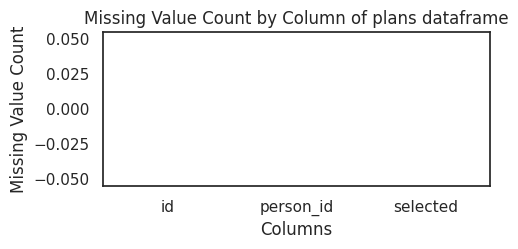

In [92]:
# Plot of missing values of plans dataframe
missing_counts_plans = plan_df.plans.isnull().sum()

# Set the style
sns.set(style="white")

# Create a countplot to visualize missing value counts
plt.figure(figsize=(5, 2))
sns.barplot(x=missing_counts_plans.index, y=missing_counts_plans.values, palette="pastel")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Count by Column of plans dataframe")
plt.show()

In [93]:
# Unique value of selected column of plans dataframe
plan_df.plans['selected'].value_counts()

selected
yes    133778
Name: count, dtype: int64

## <font color="green"> Routes Dataframe

In [94]:
# Shape of the routes dataframe
plan_df.routes.shape

(722610, 9)

In [95]:
# Head of the routes dataframe
plan_df.routes.head()

,id,leg_id,value,type,start_link,end_link,trav_time,distance,vehicleRefId
0,1,1,None,generic,270549,617713,00:03:20,239.83275324790645,NaN
1,2,3,None,generic,586404,4222,00:00:59,71.92245024668337,NaN
2,3,5,None,generic,955504,955475,00:00:00,0.0,NaN
3,4,7,None,generic,771011,166874,00:00:26,30.317917906969893,NaN
4,5,8,None,generic,166874,166874,00:00:00,0.0,NaN


/tmp/ipykernel_11725/2158357896.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_routes.index, y=missing_counts_routes.values, palette="pastel")


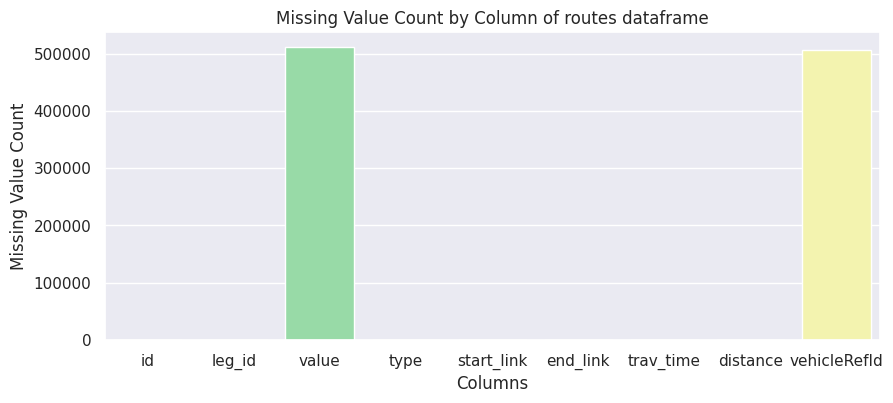

In [96]:
# Plot of missing values of routes dataframe
missing_counts_routes = plan_df.routes.isnull().sum()

# Set the style
sns.set(style="darkgrid")

# Create a countplot to visualize missing value counts
plt.figure(figsize=(10, 4))
sns.barplot(x=missing_counts_routes.index, y=missing_counts_routes.values, palette="pastel")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Value Count by Column of routes dataframe")
plt.show()

### <font color="orange"> Task 01: Age Distribution

In [97]:
# Change type of age column of persons dartaframe to integer
plan_df.persons['age'] = plan_df.persons['age'].astype(int)

/tmp/ipykernel_11725/885247551.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plan_df.persons, x="age", palette="pastel", edgecolor=".6")


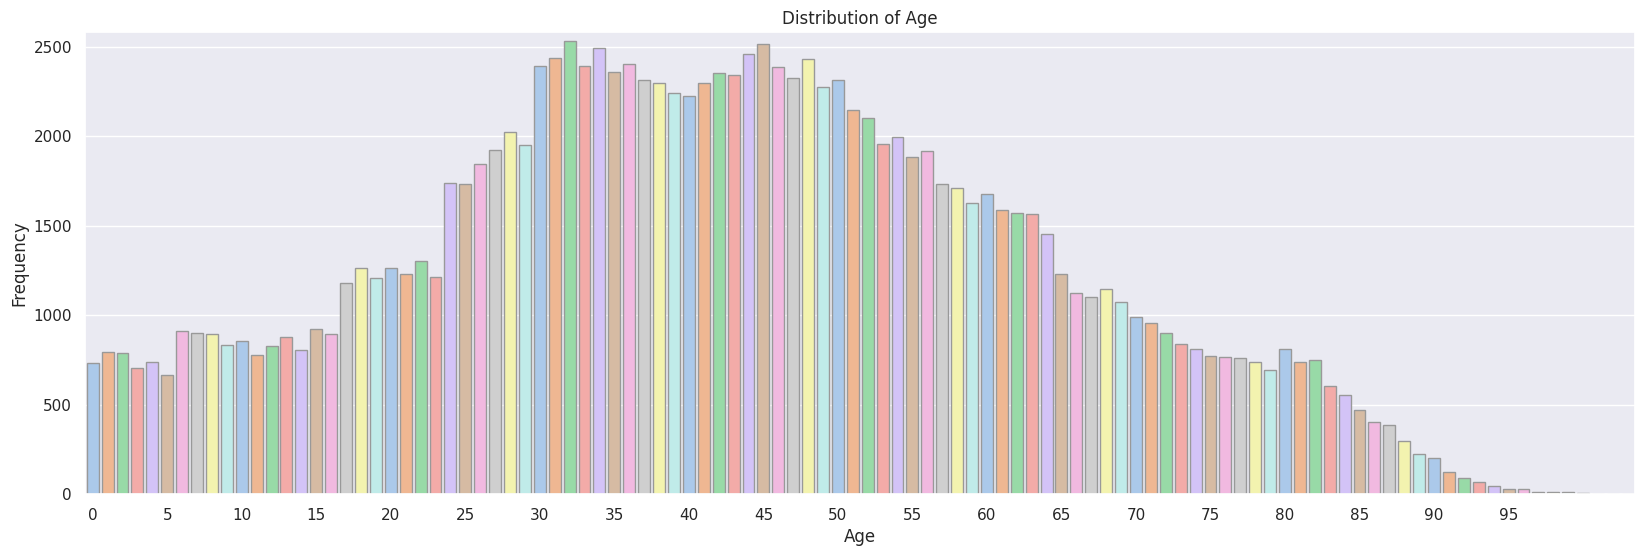

In [98]:
# Plot age distribution of the persons
# set sns style
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))

# Create a countplot for the 'age' column
sns.countplot(data=plan_df.persons, x="age", palette="pastel", edgecolor=".6")

# Add labels and a title to the plot
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

# Set the x-axis and y-axis 
max_frequency = plan_df.persons['age'].value_counts().iloc[0] + 50
plt.ylim(0, max_frequency) 
xticks_range = range(0, 100, 5)
xtick_labels = range(0, 100, 5)
plt.xticks(xticks_range, xtick_labels)
plt.yticks()

# Show the plot
plt.show()

In [99]:
# Head of value counts of age column of persons dataframe
plan_df.persons['age'].value_counts().head()

age
32    2530
45    2514
34    2491
44    2456
31    2434
Name: count, dtype: int64

/tmp/ipykernel_11725/4227037069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plan_df_higher_six, x="age", palette="pastel", edgecolor=".6")


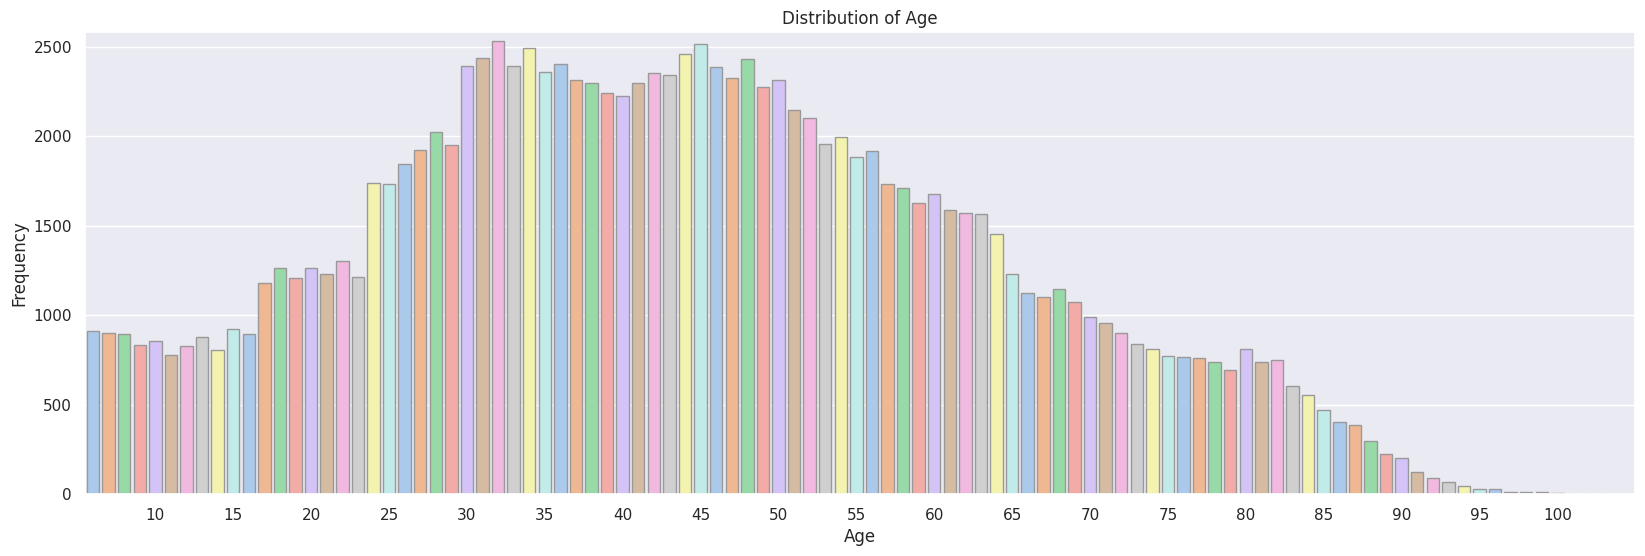

In [100]:
# Drop persons with lower than 6 years old from persons dataframe and plot again age distribution
plan_df_higher_six = plan_df.persons[plan_df.persons['age'] >= 6]

# set sns style
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))

# Create a countplot for the 'age' column
sns.countplot(data=plan_df_higher_six, x="age", palette="pastel", edgecolor=".6")


# Add labels and a title to the plot
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

# Set the x-axis and y-axis 
max_frequency = plan_df_higher_six['age'].value_counts().iloc[0] + 50
plt.ylim(0, max_frequency) 
xticks_range = range(4, 100, 5)
plt.xticks(xticks_range)
plt.yticks()

# Show the plot
plt.show()

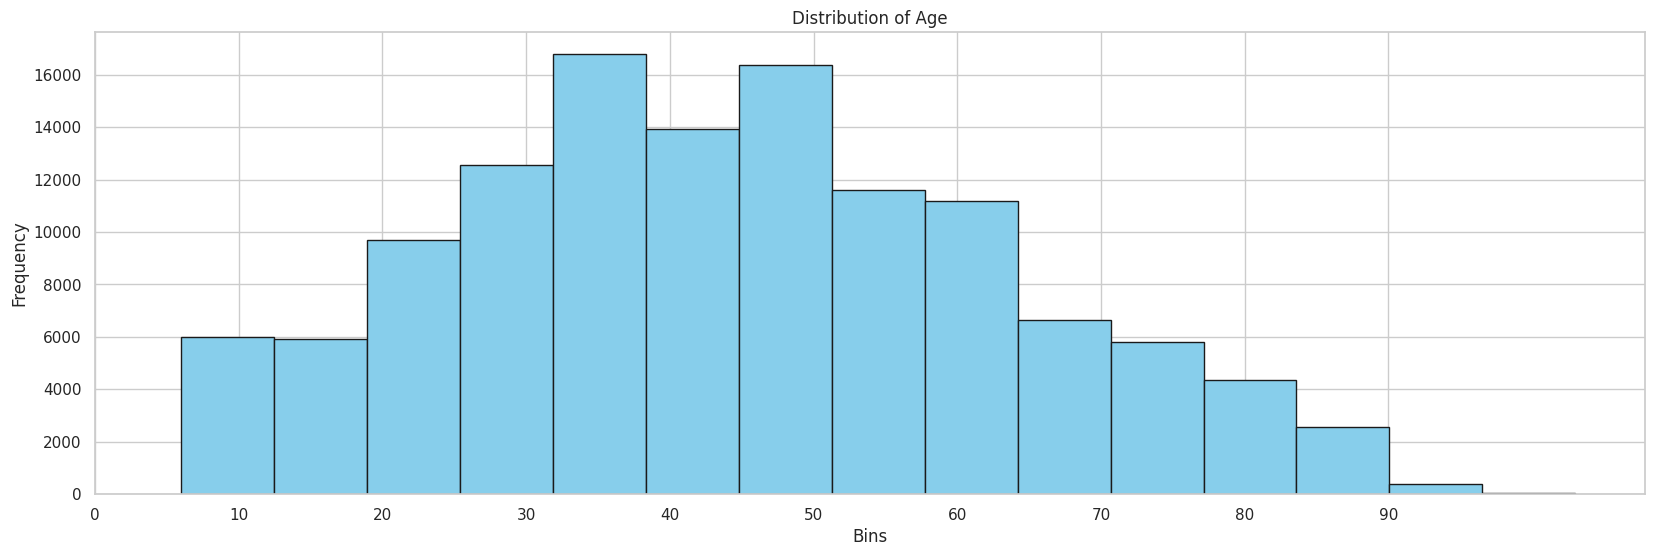

In [101]:
# Plot histogram of the ages of persons with higher than 6 years old
num_bins = 15

# Set sns style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

# Create a histogram with specified number of bins
plt.hist(plan_df_higher_six['age'], bins=num_bins, color="skyblue", edgecolor="k")


# Add labels and a title to the plot
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
xticks_range = range(0, 100, 10)
plt.xticks(xticks_range)

# Show the plot
plt.show()

### <font color="orange"> Task 2: Sex Distribution </font>

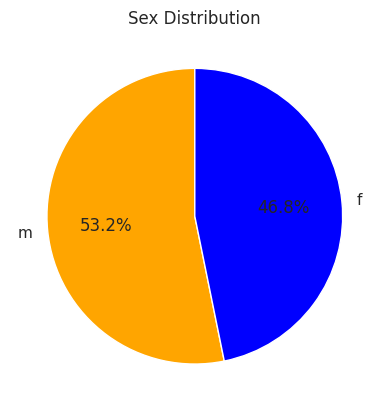

In [102]:
# Sex Distribution of the persons dataframe
labels = gender_counts = plan_df.persons['sex'].value_counts().index
sizes = gender_counts = plan_df.persons['sex'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Set the colors of pie chart
colors = ['orange', 'blue']

# Set the background color of the plot
fig.set_facecolor('white')  

# Create the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Sex Distribution")

# Show the plot
plt.show()

### <font color="orange"> Task 03: Activity Type Distribution <font>

/tmp/ipykernel_11725/3542718516.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plan_df.activities, x="type", palette="pastel", edgecolor=".6")


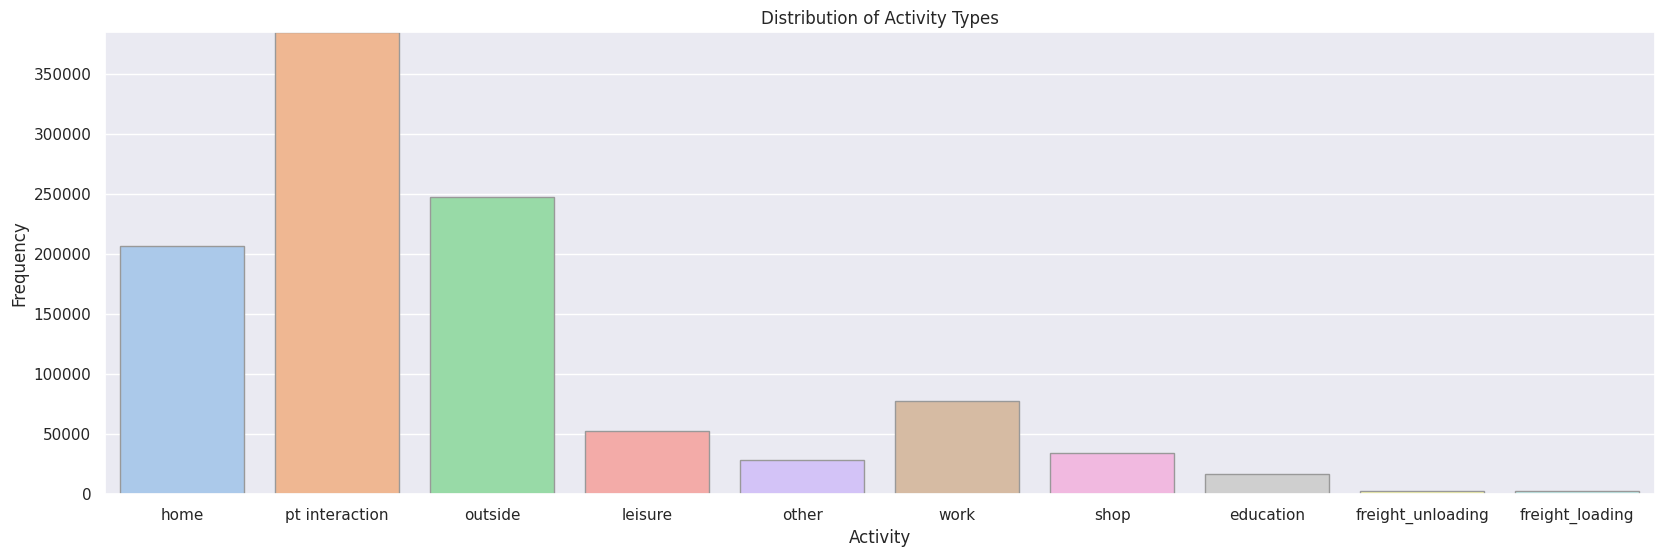

In [103]:
# Plot activity types distribution of the activities dataframe
# set sns style
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))

# Create a countplot for the 'sex' column with a circular aspect
sns.countplot(data=plan_df.activities, x="type", palette="pastel", edgecolor=".6")


# Add labels and a title to the plot
plt.xlabel("Activity")
plt.ylabel("Frequency")
plt.title("Distribution of Activity Types")

# Set the x-axis and y-axis 
max_frequency = plan_df.activities['type'].value_counts().iloc[0] + 50
plt.ylim(0, max_frequency) 
xticks_range = range(0, 10)
plt.xticks(xticks_range)
plt.yticks()

# Show the plot
plt.show()

In [104]:
# Activity types value counts
plan_df.activities['type'].value_counts()

type
pt interaction       385067
outside              247934
home                 206399
work                  77309
leisure               52304
shop                  34409
other                 28114
education             16500
freight_loading        2326
freight_unloading      2299
Name: count, dtype: int64

### <font color="orange"> Task 04: Trip Chain Distribution

In [105]:
# Replacement dictionary
replacements = {
    'home': 'H',
    'education': 'E',
    'pt interaction': 'PT',
    'outside': 'OU',
    'leisure': 'L',
    'other': 'O',
    'shop': 'S',
    'work': 'W',
    'freight_loading': 'FL',
    'freight_unloading': 'FU'
}

In [106]:
# Create a new column with short form of activity types
plan_df.activities['short_type'] = plan_df.activities['type'].replace(replacements)

In [107]:
# Eliminate PT from activities dataframe
clean_activities_df = plan_df.activities[plan_df.activities['short_type'] != 'PT']

In [108]:
clean_activities_df.shape

(667594, 14)

In [109]:
clean_activities_df.head()

,id,plan_id,type,link,facility,x,y,end_time,headway_min,max_dur,start_time,city,typeBeforeCutting,short_type
0,1,1,home,270549,home4,2679482.0,1237545.0,07:50:56,30.0,NaN,NaN,NaN,NaN,H
7,8,1,outside,166874,outside_1,2687164.597205863,1240056.4327108893,08:20:56,30.0,NaN,NaN,NaN,NaN,OU
8,9,1,outside,166874,outside_1,2687164.597205863,1240056.4327108893,08:44:00,30.0,NaN,NaN,NaN,NaN,OU
9,10,1,outside,978218,outside_2,2688162.5789000895,1240087.2224383662,08:59:00,48.0,NaN,NaN,NaN,NaN,OU
16,17,1,home,270549,home4,2679482.0,1237545.0,11:05:56,60.0,NaN,08:35:56,NaN,NaN,H


In [110]:
# Create the dataframe of activity chains
activity_chains = clean_activities_df.groupby('plan_id')['short_type'].apply(lambda x: '-'.join(x)).reset_index()

In [111]:
activity_chains.head()

,plan_id,short_type
0,1,H-OU-OU-OU-H-L-O-L-L-O-L-O-L-H-L-H
1,2,H
2,3,OU-OU-OU-OU-OU-OU-OU-OU
3,4,OU-L-W-OU
4,5,OU-OU-OU-L-OU


In [112]:
# First 15 most frequent activityu chain
activity_chains['short_type'].value_counts().head(20)

short_type
OU-W-OU                    7327
OU-OU-OU-OU                6368
H-W-H                      5630
OU-OU-W-OU                 4918
H                          4425
OU-OU                      3625
H-S-H                      3417
H-OU-OU-H                  3301
OU-OU-OU-OU-OU-OU          3082
H-L-H                      2778
H-H                        1887
OU-L-OU                    1732
H-OU-OU-OU-H               1706
H-W-H-W-H                  1434
H-E-H                      1402
H-E-H-E-H                  1235
OU-OU-OU-OU-OU             1157
FL-OU                      1153
OU-FU                      1151
OU-OU-OU-OU-OU-OU-OU-OU    1139
Name: count, dtype: int64

In [113]:
activity_chains['short_type'].value_counts()

short_type
OU-W-OU                            7327
OU-OU-OU-OU                        6368
H-W-H                              5630
OU-OU-W-OU                         4918
H                                  4425
                                   ... 
H-OU-OU-OU-OU-OU-OU-S-L-OU-OU-H       1
H-H-O-OU-OU-O-H-H-H                   1
H-E-H-L-H-E-H-O-H                     1
H-O-S-L-H-O-H-OU-OU-H-O-L-L-O-H       1
FL-OU-OU-OU-OU-OU-OU-FU               1
Name: count, Length: 10242, dtype: int64

In [114]:
plan_df.persons['age'].nunique()

104

In [115]:
plan_df.persons['age'].unique()

array([ 30,   3,  48,  52,  32,  28,  40,  36,  38,  26,  31,  25,  55,
        70,  71,  69,  23,  59,  46,  41,  64,  33,  42,   5,  27,  50,
        11,  13,  35,  63,  65,  75,  21,  62,  60,  34,  44,  43,  56,
        66,  57,  29,  53,  19,  83,  51,  15,  22,  84,  58,  61,  37,
        54,  45,  67,  17,  47,  24,  49,  72,  77,  39,  87,  16,  74,
        10,  14,  18,  73,   0,   2,  80,   6,  68,  20,   9,  82,  88,
         8,  85,  81,  97,  89,  78,  92,  79,  90,  12,   1,  76,   4,
        96,  86,   7,  93,  94,  95,  91,  99, 101, 100,  98, 103, 102])

In [116]:
pipo = activity_chains['short_type'].value_counts().index

In [117]:
values_to_drop = pipo[10:]

In [118]:
most_frequent_activity_chains = activity_chains[~activity_chains['short_type'].isin(values_to_drop)]

/tmp/ipykernel_11725/611942375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=most_frequent_activity_chains, x="short_type", order=value_counts.index, palette="pastel", edgecolor=".6")


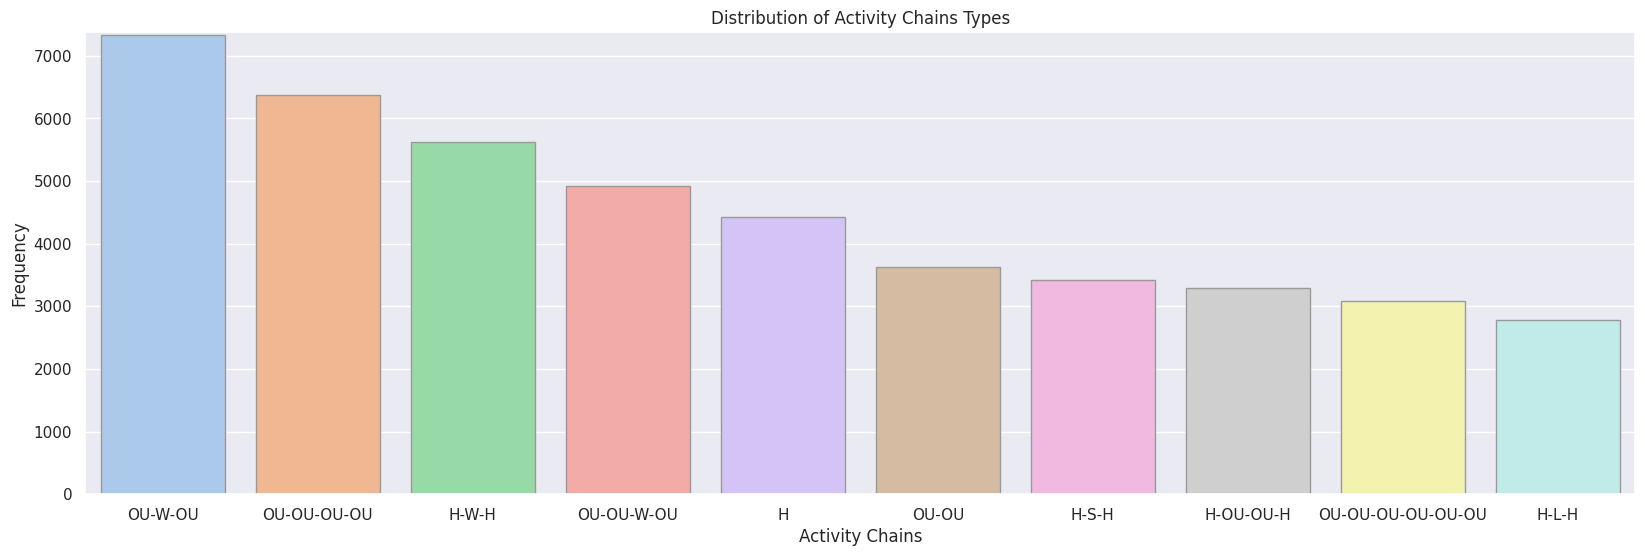

In [119]:
# Plot most frequent activity chain distribution of the most_frequent_activity_chains dataframe
# set sns style
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))

# Create a countplot for the 'sex' column with a circular aspect
value_counts = most_frequent_activity_chains['short_type'].value_counts().sort_values(ascending=False)
sns.countplot(data=most_frequent_activity_chains, x="short_type", order=value_counts.index, palette="pastel", edgecolor=".6")


# Add labels and a title to the plot
plt.xlabel("Activity Chains")
plt.ylabel("Frequency")
plt.title("Distribution of Activity Chains Types")

# Set the x-axis and y-axis 
max_frequency = most_frequent_activity_chains['short_type'].value_counts().iloc[0] + 50
plt.ylim(0, max_frequency) 
xticks_range = range(0, 10)
plt.xticks(xticks_range)
plt.yticks()

# Save the plot
# plt.savefig("pippo.png", dpi=300)

# Show the plot
plt.show()

### <font color="orange"> Task 05: O-D Distribution by Zone

In [120]:
final_activities_df = clean_activities_df[['id', 'plan_id', 'type', 'facility', 'x', 'y', 'end_time', 'start_time']]

In [121]:
final_activities_df.head()

,id,plan_id,type,facility,x,y,end_time,start_time
0,1,1,home,home4,2679482.0,1237545.0,07:50:56,NaN
7,8,1,outside,outside_1,2687164.597205863,1240056.4327108893,08:20:56,NaN
8,9,1,outside,outside_1,2687164.597205863,1240056.4327108893,08:44:00,NaN
9,10,1,outside,outside_2,2688162.5789000895,1240087.2224383662,08:59:00,NaN
16,17,1,home,home4,2679482.0,1237545.0,11:05:56,08:35:56


In [122]:
# Initialize lists to store x values
id_list = []
plan_id = []
origin_list = []
destination_list = []
x_list_o = []
y_list_o = []
x_list_d = []
y_list_d = []
start_time = []
end_time = []


# Iterate through the DataFrame
for i in range(len(final_activities_df)-1):
    current_plan_id = final_activities_df['plan_id'].iloc[i]
    next_plan_id = final_activities_df['plan_id'].iloc[i + 1]
    current_facility = final_activities_df['facility'].iloc[i]
    next_facility = final_activities_df['facility'].iloc[i + 1]
    if current_plan_id == next_plan_id and current_facility != next_facility:
        id_list.append(final_activities_df['id'].iloc[i])
        plan_id.append(final_activities_df['plan_id'].iloc[i])
        origin_list.append(final_activities_df['type'].iloc[i])
        destination_list.append(final_activities_df['type'].iloc[i + 1])
        x_list_o.append(final_activities_df['x'].iloc[i])
        y_list_o.append(final_activities_df['y'].iloc[i])
        x_list_d.append(final_activities_df['x'].iloc[i + 1])
        y_list_d.append(final_activities_df['y'].iloc[i + 1])
        start_time.append(final_activities_df['end_time'].iloc[i])
        end_time.append(final_activities_df['start_time'].iloc[i + 1])
    else:
        id_list.append(None)
        plan_id.append(None)
        origin_list.append(None)
        destination_list.append(None)
        x_list_o.append(None)
        y_list_o.append(None)
        x_list_d.append(None)
        y_list_d.append(None)
        start_time.append(None)
        end_time.append(None)

In [123]:
OD_trips = pd.DataFrame({'id': id_list, 'plan_id': plan_id, 'origin': origin_list, 'destination': destination_list,
                        'x_o': x_list_o, 'y_o': y_list_o, 'x_d': x_list_d, 'y_d': y_list_d, 'trip_start_time':start_time, 'trip_end_time': end_time})

In [124]:
OD_trips.shape

(667593, 10)

In [125]:
OD_trips.dropna(subset=['id'], inplace=True)

In [126]:
OD_trips.shape

(509229, 10)

In [127]:
# OD_trips.to_csv("od_trips.csv", index=False)

In [128]:
OD_trips.head()

,id,plan_id,origin,destination,x_o,y_o,x_d,y_d,trip_start_time,trip_end_time
0,1.0,1.0,home,outside,2679482.0,1237545.0,2687164.597205863,1240056.4327108893,07:50:56,NaN
2,9.0,1.0,outside,outside,2687164.597205863,1240056.4327108893,2688162.5789000895,1240087.2224383662,08:44:00,NaN
3,10.0,1.0,outside,home,2688162.5789000895,1240087.2224383662,2679482.0,1237545.0,08:59:00,08:35:56
4,17.0,1.0,home,leisure,2679482.0,1237545.0,2680684.0,1236911.0,11:05:56,11:15:56
5,18.0,1.0,leisure,other,2680684.0,1236911.0,2680896.0,1238970.0,11:35:56,11:40:56
